In [1]:
# read and load the data using Pandas
import pandas as pd

data = pd.read_csv('train.csv')
#use a copy of the dataset to avoid original data loss
df = data.copy()

In [2]:
# Take a look first 5 rows
df.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0


In [3]:
# Take a look last 5 rows
df.tail()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2372800,3352878,718,TRANSFER,365959.08,C0575993734,9750032.16,9384073.08,C0205431023,7479928.58,7845887.66,0,0
2372801,3352879,718,CASH_OUT,51782.58,C8713379202,3457100.71,3405318.13,C2547402522,159726.22,159726.22,0,0
2372802,3352883,718,CASH_IN,74040.32,C4075734978,3009859.11,3083899.42,C2435516230,105711.72,105711.72,0,0
2372803,3352884,718,PAYMENT,11726.71,C8642260114,2980280.08,2968553.37,C5055233979,94282.56,106009.27,0,0
2372804,3352886,718,CASH_IN,115158.72,C0725945548,3599990.89,3715149.61,C1039537388,216298.60,216298.60,0,0


In [4]:
# Describe the data
df.describe()

,Id,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,2.372805e+06,2.372805e+06,2.372805e+06,2.372805e+06,2.372805e+06,2.372805e+06,2.372805e+06,2.372805e+06,2372805.0
mean,1.676995e+06,1.832920e+02,1.454519e+05,3.332226e+06,3.315864e+06,2.823591e+05,3.299378e+05,7.501670e-05,0.0
std,9.679376e+05,1.258774e+02,3.122165e+05,1.777183e+06,1.744702e+06,9.554569e+05,1.138435e+06,8.660895e-03,0.0
min,0.000000e+00,0.000000e+00,1.100000e-01,-1.959696e+05,-1.959696e+05,-1.439078e+05,-6.233257e+04,0.000000e+00,0.0
25%,8.383540e+05,4.400000e+01,1.436889e+04,2.563357e+06,2.559986e+06,2.179805e+04,2.391135e+04,0.000000e+00,0.0
50%,1.677475e+06,1.870000e+02,9.785308e+04,3.425072e+06,3.407159e+06,7.714657e+04,7.965216e+04,0.000000e+00,0.0
75%,2.515399e+06,2.650000e+02,1.714096e+05,4.117519e+06,4.089955e+06,1.414099e+05,1.443928e+05,0.000000e+00,0.0
max,3.352886e+06,7.180000e+02,2.026857e+07,4.955674e+07,4.882798e+07,4.783798e+07,4.799305e+07,1.000000e+00,0.0


In [5]:
# Information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372805 entries, 0 to 2372804
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Id              int64  
 1   step            int64  
 2   action          object 
 3   amount          float64
 4   nameOrig        object 
 5   oldBalanceOrig  float64
 6   newBalanceOrig  float64
 7   nameDest        object 
 8   oldBalanceDest  float64
 9   newBalanceDest  float64
 10  isFraud         int64  
 11  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 217.2+ MB


The description shows;

how many column/feature are there - 12,
how many rows are there (RangeIndex) - 2372805,
feature/column names and their dtypes

In [6]:
# Number of missing values in each column of the data
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


The result which is above shows that there is no missing value(null/none) include features and target.
Therefore, do not need to impute missing values or drop the features which have missing values

------------ Exploratory of DAta Analysis (EDA) -----------

Feature descriptin:

The data set consists of a table with numerous transactions. The meaning of each column is provided below:
- step (int) - maps a unit of time in the real world. In this case 1 step is 1 hour of time
- type (text) - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
        - CASH-IN: the process of increasing the balance of account by paying in cash to a merchant
        - CASH-OUT: it means to withdraw cash from a merchant which decreases the balance of the account
        - DEBIT: the process of sending the money from the mobile money service to a bank account
        - PAYMENT: process of paying for goods or services to merchants which decreases the balance of the account and  increases the balance of the receiver
        - TRANSFER: process of sending money to another user of the service through the mobile money platform
- amount (double) - amount of the transaction in local currency.
- nameOrig (text) - customer who started the transaction
- oldbalanceOrg (double) - initial balance before the transaction
- newbalanceOrig (double) - new balance after the transaction
- nameDest (text) - customer who is the recipient of the transaction
- oldbalanceDest (double) - initial balance recipient before the transaction. Note that there is not information for       customers that start with M (Merchants).
- newbalanceDest (double) - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
- isFraud (int) - if the transaction is fraudulent or not (0/1)
- isFlaggedFraud (int) - an attempt to transfer more than 200.000 in a single transaction (0/1)

isFraud target analyse

In [7]:
# The number of Frauded and not Fradued transactions
print(f"isFraud Distribution amount: \n{df['isFraud'].value_counts()}")

isFraud Distribution amount: 
0    2372627
1        178
Name: isFraud, dtype: int64


In [8]:
# Fraud distribution Percentage
print(df['isFraud'].value_counts(normalize= True))

0    0.999925
1    0.000075
Name: isFraud, dtype: float64


This result which is above show that  very little numbers of transactions are frauded. Therefore, usually should focus fradued transactions. 

FlaggedFraud analyse

In [9]:
# When checked isFlaggedFraud feature, It does not contain given condition.
print(df['isFlaggedFraud'].value_counts())


0    2372805
Name: isFlaggedFraud, dtype: int64


In [10]:
# isFlaggedFraud column/feature filled according to the given condition
df.loc[df['amount'] > 200000 , 'isFlaggedFraud'] = 1 

In [11]:
print(df['isFlaggedFraud'].value_counts(normalize= True))

0    0.823398
1    0.176602
Name: isFlaggedFraud, dtype: float64


From the feature description, we know that isFlaggedFraud is when the system marked an illegal attempt to transfer more than 200.000 in a single transaction. But, we do not know how the system works. However, can clearly see that the amount of transaction with more than 200,000 in the 2.4 millions data and only 17% of them isFlaggedFraud. Since, It shows an unreliability information, can drop this feature in our further analysis or threshold number (200.000) can change or a range can be given .

Step/hour analyse

In [12]:
#convert hours(step) to day
dayno = []
dayhour = []
for i in range(1,31):
    dayno.append(i)
for i in range(31):
    dayhour.append(i*24)

df['day'] =pd.cut(df['step'],dayhour, labels=dayno)
df['day'].iloc[0] = 1
df['day'] = df['day'].astype(int)

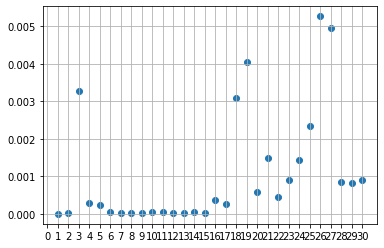

In [13]:
import matplotlib.pyplot as plt
import numpy as np

a = df.groupby(['day']).mean()

plt.scatter(a.index,a['isFraud'])

plt.xticks(np.arange(0, 743/24, 1))
plt.grid()

When observed the figure, which is above, there are more Fraduded transactions at the second half of the month than the first half of the month.    

Amount and balance features analyse

In [14]:
df['ErrorDest'] = df['newBalanceDest'] - df['oldBalanceDest'] != df['amount']

Initial number of rows/transactions were approximately 2.4 million. Now, have approximately 700.000 rows. 

In [16]:
df['ErrorDest'].value_counts()

True     2276056
False      96749
Name: ErrorDest, dtype: int64

In [17]:
df['ErrorOrig'] = df['newBalanceOrig'] - df['oldBalanceOrig'] != df['amount']*-1

In [18]:
df['ErrorOrig'].value_counts()

True     2308219
False      64586
Name: ErrorOrig, dtype: int64

In [19]:
df.loc[((df['ErrorOrig'] == False) & (df['ErrorDest'] == False))].value_counts()

Id       step  action    amount      nameOrig     oldBalanceOrig  newBalanceOrig  nameDest     oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  day  ErrorDest  ErrorOrig
0        0     TRANSFER  10.00       C0198526315  30112.00        30102.00        C4653045645  21927.84        21937.84        0        0               1    False      False        1
2368786  258   PAYMENT   6161.50     C8421370346  4032550.30      4026388.80      C0455062881  156050.77       162212.27       0        0               11   False      False        1
2370680  258   PAYMENT   20854.50    C2555601518  7699332.52      7678478.02      C8641491173  129646.91       150501.41       0        0               11   False      False        1
2370312  258   TRANSFER  2096499.75  C9132643023  4466114.46      2369614.71      C8169619547  2810908.46      4907408.21      0        1               11   False      False        1
2370278  258   TRANSFER  2811309.71  C8471629841  4093191.51      1281881.80      C7370794

Number of False from writen condition, expected there are 178 false. Because, Frauded transcations are 178. This result shows the data is imbalanced. Therefore, amount and balance features will use firectly for mode.

Type analyse

In [20]:
# Show which transaction types/actions were detected as fraud

print(f"These transaction types were detected as fraud: {df[df['isFraud']==1]['action'].unique()}")

These transaction types were detected as fraud: ['CASH_OUT' 'TRANSFER']


This info provides very usefull. Except cash_out and transfer types/actions are useless

In [21]:
# The distribution of the frauds by frauded actions
df.loc[(df['isFraud']==1),'action'].value_counts(normalize=True)

CASH_OUT    0.52809
TRANSFER    0.47191
Name: action, dtype: float64

Summary of EDA:

Analyses of each features show that:
- amount and balance features are imbalanced and they should be uses in the model
- Type features provided just action/type should use (transfer and cash-out). Also, they should be encoded for the model
- isFlaggedFraud is useless from given condition. Therefore, it should be dropped
- name textes are hashed text values and they are useless for this case
- step can convert to days and it provides dividing the half by half. It helps the model 

Feature engineering and selection

In [22]:
# Dropping the other types of transaction since fraud only detected on Transfer and Cash Out

df.drop(df.loc[(df['action']!='CASH_OUT') & (df['action']!='TRANSFER')].index, inplace=True)

In [23]:
# resetting the index and check shape

df.reset_index(inplace=True)
print(df.shape)

(699523, 16)


Initial number of rows/transactions were approximately 2.4 million. Now, have approximately 700.000 rows. 

In [24]:
# Encode the types transaction

df['Type_encode'] = df['action'].map({'TRANSFER': 0, 'CASH_OUT': 1})

In [32]:
# Encode the day

df['day_encode'] = 1
df.loc[df['day'] <= 15, 'day_encode'] = 0

In [36]:
df.columns

Index(['index', 'Id', 'step', 'action', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFraud', 'isFlaggedFraud', 'day', 'ErrorDest', 'ErrorOrig',
       'Type_encode', 'day_encode'],
      dtype='object')

In [37]:
df1 = df.copy()

In [38]:
# Drop useless features from the data

df1.drop(columns=['index','Id','step','action','nameOrig','nameDest','isFlaggedFraud','day','ErrorDest','ErrorOrig'],inplace=True)

In [39]:
df1.columns

Index(['amount', 'oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest',
       'newBalanceDest', 'isFraud', 'Type_encode', 'day_encode'],
      dtype='object')

------------------------- Model -----------------------

In [40]:
y = df1.isFraud
x_nostand = df1.drop(columns=['isFraud'])

In [41]:
#standardize the values in each column
X = (x_nostand-x_nostand.mean())/x_nostand.std()

In [42]:
from sklearn.decomposition import PCA
pca_X = PCA(n_components=5)
pca_X_fit = pca_X.fit_transform(X)

pcaX_Df = pd.DataFrame(data = pca_X_fit
             , columns = ['PC 1', 'PC 2','PC 3','PC 4','PC 5'])

pcaX_Df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,0.490758,-3.323125,0.040710,-0.734651,-1.975117
1,0.680505,-3.353544,-0.004499,-0.291038,-1.959681
2,-0.725060,-3.279630,0.047890,-0.088818,0.121539
3,-0.776534,-3.392226,0.069330,-0.215452,0.117330
4,0.561627,-3.351806,0.022859,-0.549696,-1.973983


In [43]:
# Percentage of variance explained for each components
print(
    "explained variance ratio of the components): %s"
    % str(pca_X.explained_variance_ratio_)
)

explained variance ratio of the components): [0.4634817  0.28084788 0.14299244 0.08008624 0.02950503]


The result which is above show that first 2 principal component give %74

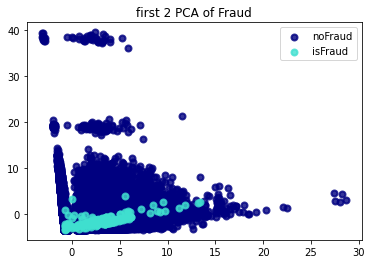

In [45]:
import matplotlib.pyplot as plt

plt.figure()
colors = ["navy", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, ], ['noFraud','isFraud']):
    plt.scatter(
        pca_X_fit[y == i, 0], pca_X_fit[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("first 2 PCA of Fraud")

plt.show()

Metrics and Split

In [46]:
f1 = []
prec = []
recall = []
acc = []

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

def evaluationMetrics(y_test, y_pred):
    f1.append(f1_score(y_test,y_pred))
    prec.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))

In [48]:
metric = pd.DataFrame(index = ['Logistic Regression', 'Random Forest Classifier'])
#metric = pd.DataFrame(index = ['Logistic Regression', 'Random Forest Classifier','Random Forest Classifier Tuned'])

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.2, stratify=y, random_state=21)

Logistic Reggresion model

In [50]:
from sklearn.linear_model import LogisticRegression

ModelLR = LogisticRegression()
ModelLR.fit(X_train,y_train)
y_LR = ModelLR.predict(X_test)

In [51]:
print(classification_report(y_test, y_LR))
evaluationMetrics(y_test,y_LR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139869
           1       0.93      0.69      0.79        36

    accuracy                           1.00    139905
   macro avg       0.96      0.85      0.90    139905
weighted avg       1.00      1.00      1.00    139905



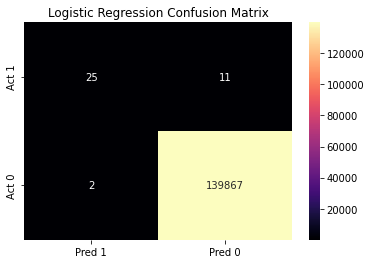

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_LR = confusion_matrix(y_test, y_LR, labels=[1 , 0])
df_cm_LR = pd.DataFrame(data=cm_LR,index=["Act 1" ,"Act 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(df_cm_LR, annot=True, fmt='d',cmap='magma');
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest model

In [53]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train,y_train)
y_RF = modelRF.predict(X_test)

In [54]:
print(classification_report(y_test, y_RF))
evaluationMetrics(y_test,y_RF)
print(f"Train Score: {modelRF.score(X_train, y_train)}\nTest Score: {modelRF.score(X_test, y_test)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139869
           1       1.00      0.78      0.88        36

    accuracy                           1.00    139905
   macro avg       1.00      0.89      0.94    139905
weighted avg       1.00      1.00      1.00    139905

Train Score: 1.0
Test Score: 0.9999428183410172


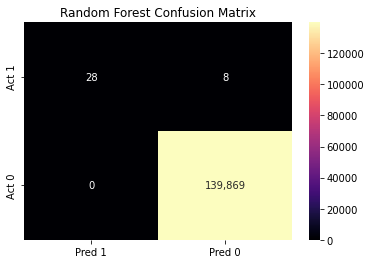

In [55]:
cm_RF = confusion_matrix(y_test, y_RF, labels=[1 , 0])
df_cm_RF = pd.DataFrame(data=cm_RF,index=["Act 1" ,"Act 0"], columns=["Pred 1", "Pred 0"])
sns.heatmap(df_cm_RF, annot=True, fmt=',d',cmap='magma');
plt.title('Random Forest Confusion Matrix')
plt.show()

Results

In [56]:
metric['F1-Score'] = f1
metric['Recall'] = recall
metric['Precision'] = prec
metric['Accuracy'] = acc

In [57]:
metric.sort_index()

,F1-Score,Recall,Precision,Accuracy
Logistic Regression,0.793651,0.694444,0.925926,0.999907
Random Forest Classifier,0.875000,0.777778,1.000000,0.999943


Conclusion:
- with Random Forest model, the model succeeded on lowering the errors on predicting a fraud as non fraud